In [72]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.set_context("talk")
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

## OLS estimator

In [73]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [74]:
# add col of ones
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [77]:
X.shape

(100, 3)

In [78]:
y.shape

(100,)

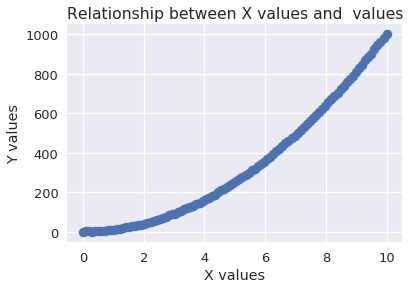

In [79]:

# your turn# your t 
plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")

plt.title("Relationship between X values and  values")
plt.show()

In [80]:
#3 fit and summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 16 Jul 2018   Prob (F-statistic):          2.83e-239
Time:                        19:37:31   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [11]:
# Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


##  OLS non-linear curve but linear in parameters¶
We simulate artificial data with a non-linear relationship between x and y:

In [12]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

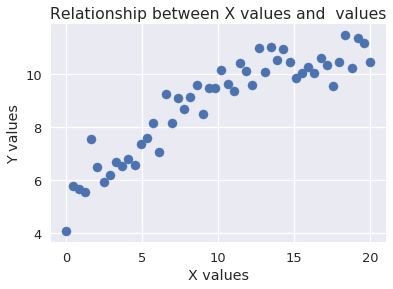

In [13]:

# your turn# your t 
plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")

plt.title("Relationship between X values and  values")
plt.show()

In [14]:
# fit and summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           3.30e-25
Time:                        17:25:41   Log-Likelihood:                -38.308
No. Observations:                  50   AIC:                             84.62
Df Residuals:                      46   BIC:                             92.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4704      0.029     16.487      0.0

In [15]:
# Extract other quantities of interest:

print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.47040466  0.2931004  -0.01826292  5.24935422]
Standard errors:  [0.02853117 0.11215937 0.00250506 0.18499717]
Predicted values:  [ 4.79278116  5.17262168  5.52726298  5.84073136  6.10281792  6.31075592
  6.46967527  6.59175976  6.69424528  6.796588    6.91726779  7.07075203
  7.26511865  7.50072896  7.77016828  8.05946415  8.35038197  8.62342091
  8.8610178   9.05043274  9.18584224  9.26929595  9.31037998  9.32464188
  9.33103621  9.34881043  9.39434252  9.47845015  9.60461339  9.76840293
  9.95820778 10.15714295 10.34582361 10.50554994 10.62137947 10.68458209
 10.69407437 10.65659757 10.58561009 10.49907624 10.41651482 10.3557922
 10.33018692 10.34620807 10.4025259  10.49019023 10.594101   10.69548911
 10.77500019 10.81587443]


draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the wls_prediction_std command.

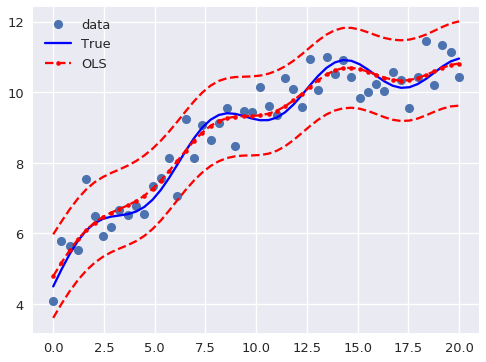

In [17]:

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## OLS with dummy variables
We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [18]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [20]:
# inspect data
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.67215284  9.78038343 10.78928596 11.92158064 10.56260727]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


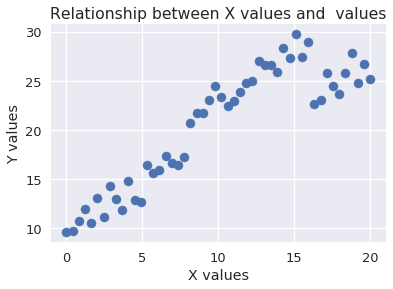

In [19]:

# your turn# your t 
plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")

plt.title("Relationship between X values and  values")
plt.show()

In [21]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     551.9
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           4.66e-36
Time:                        17:28:12   Log-Likelihood:                -70.988
No. Observations:                  50   AIC:                             150.0
Df Residuals:                      46   BIC:                             157.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9848      0.068     14.478      0.0

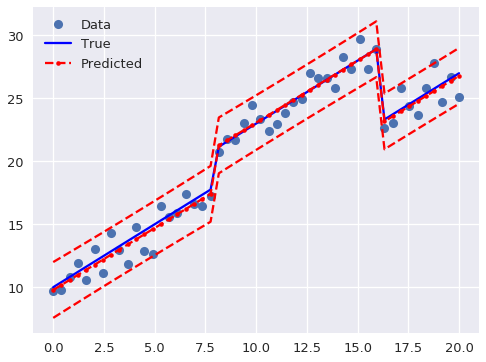

In [22]:
# Draw a plot to compare the true relationship to OLS predictions:

prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# Regression diagonstic
## estimate a regression model



In [23]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           1.90e-08
Time:                        17:31:30   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

## Normality of the residualsa

In [24]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 3.3936080248431852),
 ('Chi^2 two-tail prob.', 0.18326831231663193),
 ('Skew', -0.4865803431122351),
 ('Kurtosis', 3.003417757881635)]

## Omni test

In [25]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.713437811597202), ('Two-tail probability', 0.15618424580304663)]

## Influence tests
Once created, an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [26]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[-0.00301154,  0.00290872,  0.00118179],
       [-0.06425662,  0.04043093,  0.06281609],
       [ 0.01554894, -0.03556038, -0.00905336],
       [ 0.17899858,  0.04098207, -0.18062352],
       [ 0.29679073,  0.21249207, -0.3213655 ]])

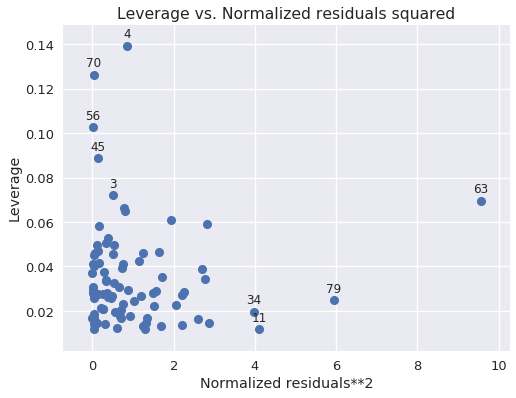

In [27]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

## Regression plots

In [28]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Duncan's Prestige Dataset
Load the Data
We can use a utility function to load any R dataset available from the great Rdatasets package.

In [35]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [37]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()

In [38]:
print(prestige_model.summary())


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           8.65e-17
Time:                        17:37:16   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

## Influence plots
Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.

Externally studentized residuals are residuals that are scaled by their standard deviation where



$$
var(ϵ^i)=σ^2i(1−hii)
$$ 
with
$$
σ^2i=1n−p−1∑jn∀j≠i
$$
n  is the number of observations and  p  is the number of regressors.  hii  is the  i -th diagonal element of the hat matrix
$$
H=X(X′X)−1X′
$$ 
The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

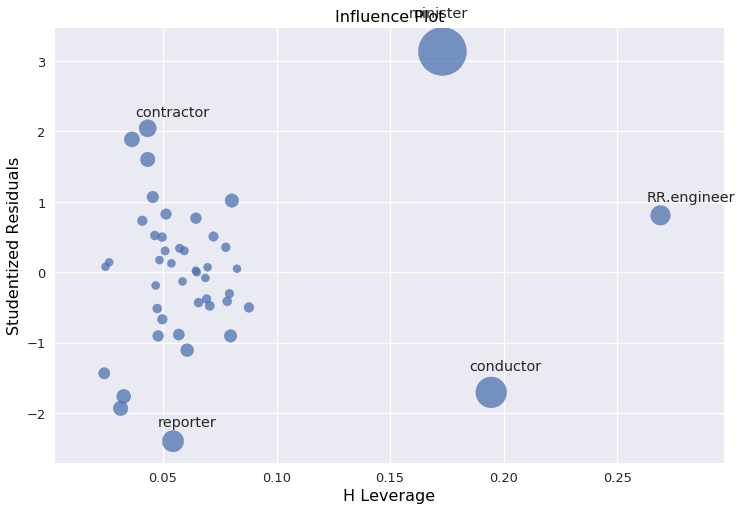

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")

As you can see there are a few worrisome observations. Both contractor and reporter have low leverage but a large residual. 
RR.engineer has small residual and large leverage. Conductor and minister have both high leverage and large residuals, and, 
therefore, large influence.

## Partial Regression Plots
Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships. 
Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other 
independent variables. We can do this through using partial regression plots, otherwise known as added variable plots. 

In a partial regression plot, to discern the relationship between the response variable and the  k -th variabe, we compute 
the residuals by regressing the response variable versus the independent variables excluding  Xk . We can denote this by 
X∼k . We then compute the residuals by regressing  Xk  on  X∼k . The partial regression plot is the plot 
of the former versus the latter residuals. 

The notable points of this plot are that the fitted line has slope  βk  and intercept zero. The residuals of this plot 
are the same as those of the least squares fit of the original model with full  X . You can discern the effects of the 
individual data values on the estimation of a coefficient easily. If obs_labels is True, then these points are annotated 
with their observation label. You can also see the violation of underlying assumptions such as homooskedasticity and 
linearity.

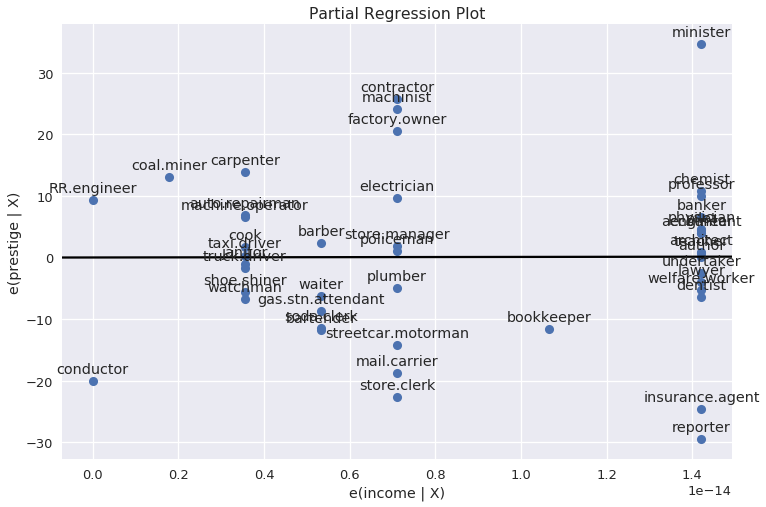

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=prestige, ax=ax)

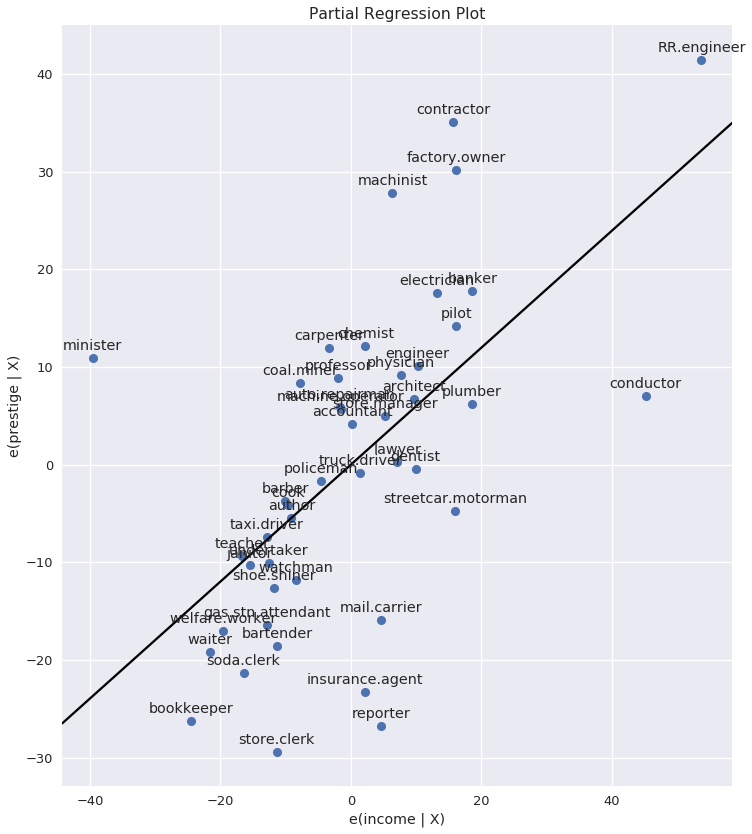

In [44]:
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige, ax=ax)

As you can see the partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

In [45]:
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
prestige_model2 = ols("prestige ~ income + education", data=prestige, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.02e-18
Time:                        17:41:03   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

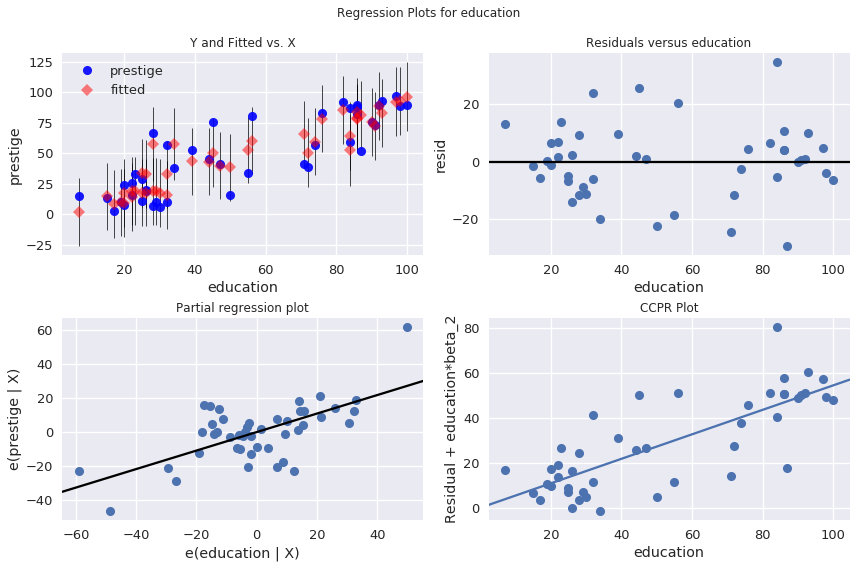

In [46]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(prestige_model, "education", fig=fig)

 # Statewide crime dataset

In [65]:
dta = pd.read_csv("http://www.stat.ufl.edu/~aa/social/csv_files/statewide-crime-2.csv")
#dta.index.dropna()
dta.set_index("State", inplace=True)
dta.head()

,VR,MR,M,W,H,P,S
State,,,,,,,
AK,761,9.0,41.8,75.2,86.6,9.1,14.3
AL,780,11.6,67.4,73.5,66.9,17.4,11.5
AR,593,10.2,44.7,82.9,66.3,20.0,10.7
AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [66]:
dta.rename(columns={"VR" : "crime",
                   "MR" : "murder",
                   "M"  : "pctmetro",
                   "W"  : "pctwhite",
                   "H"  : "pcths",
                   "P"  : "poverty",
                   "S"  : "single"
                   }, inplace=True)

crime_model = ols("murder ~ pctmetro + poverty + pcths + single", data=dta).fit()

In [67]:
dta = sm.datasets.statecrime.load_pandas().data
dta.head()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/numpy/lib/npyio.py:2230: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
b'Alabama',459.9,7.1,82.1,17.5,29.0,70.0,48.65
b'Alaska',632.6,3.2,91.4,9.0,25.5,68.3,44.46
b'Arizona',423.2,5.5,84.2,16.5,25.7,80.0,80.07
b'Arkansas',530.3,6.3,82.4,18.8,26.3,78.4,39.54
b'California',473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [68]:
crime_model = ols("murder ~ urban + poverty + hs_grad + single", data=dta).fit()
print(crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           3.42e-16
Time:                        17:52:18   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.1024     12.086     -3.649      0.0

# partial regressoin plots

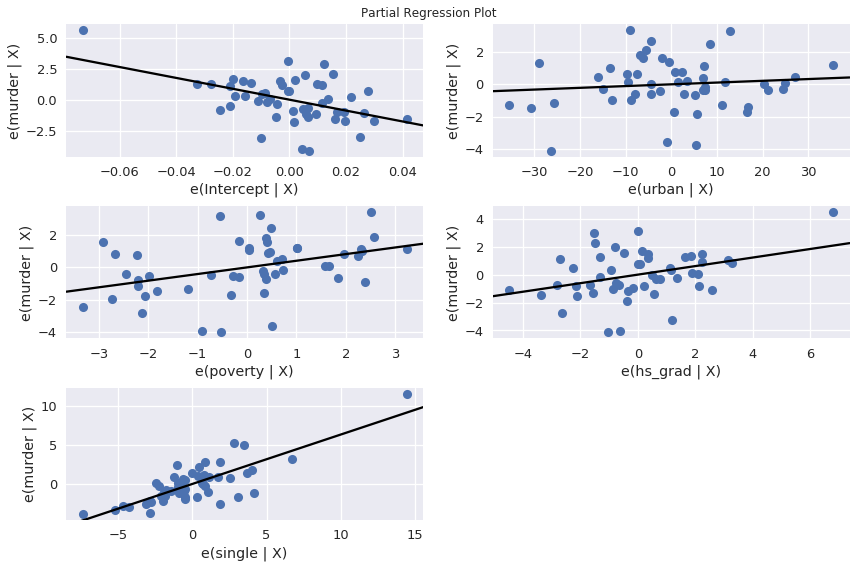

In [69]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(crime_model, fig=fig)

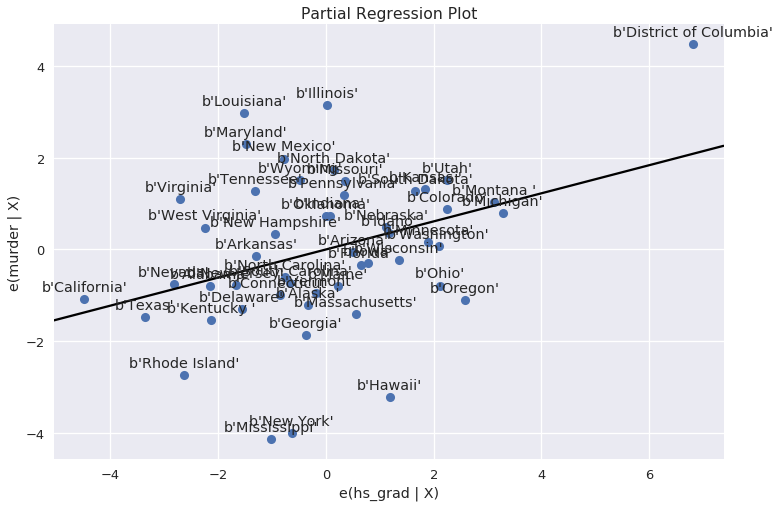

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("murder", "hs_grad", ["urban", "poverty", "single"],  ax=ax, data=dta)

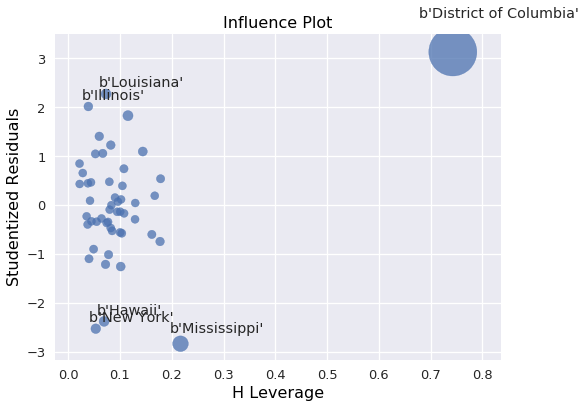

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(crime_model, ax=ax)